In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import joypy
#!pip install pywaffle
from pywaffle import Waffle
#!pip install joypy
from IPython.display import display
#import plotly.plotly as py # interactive graphing
#import plotly.graph_objs as go
import seaborn as sns
plt.style.use('seaborn')
from datetime import datetime
from datetime import timedelta

#% matplotlib inline
# Import API key
from config import gkey

In [31]:

df=pd.read_csv("311dataphillyfinalcleanup.csv")
df.head()

,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,DEPARTMENT,NEIGHBORHOOD,X,Y
0,2015-04-20T08:38:00,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.015178,40.392419
1,2015-04-20T08:39:00,Potholes,Call Center,DPW - Street Maintenance,Beechview,-80.013359,40.412076
2,2015-04-20T08:42:00,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.018696,40.400007
3,2015-04-20T08:43:00,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.016089,40.399618
4,2015-04-20T08:44:00,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.015041,40.407071


In [32]:
#df.groupby("REQUEST_ORIGIN")["NEIGHBORHOOD"].count()

In [33]:
# x, y = -np.log10(np.random.random_sample((2,10**6)))

# #histogram definition
# bins = [1000, 1000] # number of bins

# # histogram the data
# hh, locx, locy = np.histogram2d(x, y, bins=bins)

# # Sort the points by density, so that the densest points are plotted last
# REQUEST_TYPE = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
# idx = z.argsort()
# x2, y2, z2 = x[idx], y[idx], z[idx]

# plt.figure(1,figsize=(8,8)).clf()
# REQUEST_ID = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.')  
# plt.ylabel("REQUEST_TYPE")
# plt.title("Histogram with 'auto' bins")

In [49]:
neighbor_top.index

Index(['Brookline', 'Carrick', 'South Side Slopes', 'Squirrel Hill South',
       'Beechview'],
      dtype='object')

Text(0.5, 1.02, 'TOP REQUEST BY NEIGHBORHOOD')

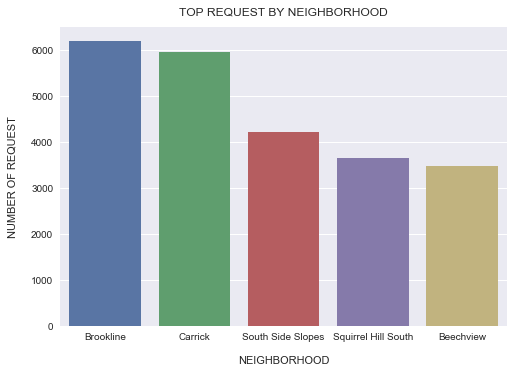

In [50]:


neighbor_top = df['NEIGHBORHOOD'].value_counts()[:5]
neighbor_top_df = pd.DataFrame({"neighborhood":neighbor_top.index,"request":neighbor_top})
sns.barplot(x="neighborhood", y="request", data=neighbor_top_df)
plt.xlabel("NEIGHBORHOOD", labelpad=14)
plt.ylabel("NUMBER OF REQUEST", labelpad=14)
plt.title("TOP REQUEST BY NEIGHBORHOOD", y=1.02)

# Plot with small marker size
#plt.plot(neighbor_top, linestyle='', marker='o', markersize=0.7)


Text(0.5, 1.0, "Histogram with 'auto' bins")

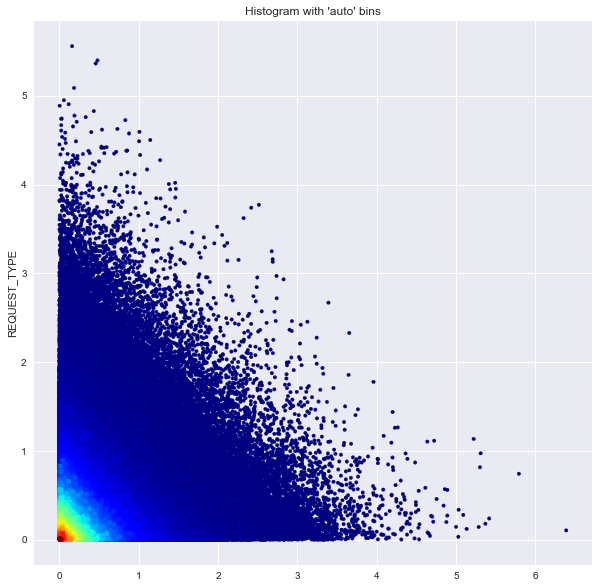

In [35]:
#works, looks cool but really does not show anything of value
# x, y = -np.log10(np.random.random_sample((2,10**6)))

# #histogram definition
# bins = [1000, 1000] # number of bins

# # histogram the data
# hh, locx, locy = np.histogram2d(x, y, bins=bins)

# # Sort the points by density, so that the densest points are plotted last
# z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
# idx = z.argsort()
# x2, y2, z2 = x[idx], y[idx], z[idx]

# plt.figure(1,figsize=(10,10)).clf()
# s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.') 
# plt.ylabel("REQUEST_TYPE")
# plt.title("Histogram with 'auto' bins")

In [36]:
# #https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#1.-Scatter-plot
# df = pd.read_csv("311dataphillyfinalcleanup.csv")
# import matplotlib.pyplot as plt
# import joypy
# # Draw Plot
# plt.figure(figsize=(16,10), dpi= 80)
# fig, axes = joypy.joyplot(REQUEST_TYPE, column=['NEIGHBORHOOD'], by="NEIGHBORHOOD", ylim='own', figsize=(14,10))

# # Decoration
# plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
# plt.show()

KeyError: 'NEIGHBORHOOD'

<Figure size 1280x800 with 0 Axes>

In [39]:

# Import
df = pd.read_csv("311dataphillyfinalcleanup.csv")

# Prepare Data
df = df.groupby('NEIGHBORHOOD', 'REQUEST_ORIGIN').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots=
#     {
        
#     '313': {
#             'values': df['counts_REQUEST_ORIGIN'],
#             'labels': ["{1}".format(n[0], n[1]) for n in df[['NEIGHBORHOOD', 'counts_REQUEST_ORIGIN']].itertuples()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'NEIGHBORHOOD'},
#             'title': {'label': '# Contact Type per Neighborhood', 'loc': 'center', 'fontsize':18},
#             'colors': colors_make
#         }
#     },
#     rows=9,
#     figsize=(16, 14)
# )
    
    
    
    {
        '111': {
            'values': df['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in df[['REQUEST_ORIGIN', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=2,
    colors=colors,
    figsize=(16, 7)
)

ValueError: No axis named REQUEST_ORIGIN for object type <class 'pandas.core.frame.DataFrame'>